In [73]:
import numpy as np
# import os
# import glob
# from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
# from scipy import stats
# import copy
# import sys
# sys.path.append("../")
# from FIESTA_functions import *
import pandas as pd
from NEID_solar_functions import *
from GP_kernels import *
# import shutil

In [74]:
EXPRES_df  	= pd.read_csv('220621_expres_rvs.csv')

In [75]:
EXPRES_df

obnm     doy       mnvel    errvel           hjd       vpred  \
0      200731.1075  200731  -47.504741  0.209515  2.459062e+06 -271.419731   
1      200731.1076  200731 -243.198837  0.331019  2.459062e+06 -263.250825   
2      200731.1080  200731  -64.123596  0.273428  2.459062e+06  -60.790902   
3      200801.1067  200801 -417.931594  0.515926  2.459063e+06 -476.835395   
4      200801.1068  200801 -423.459396  0.513095  2.459063e+06 -469.675732   
...            ...     ...         ...       ...           ...         ...   
34446  220418.5186  220418  445.060166  0.356409  2.459688e+06  444.906372   
34447  220418.5187  220418  449.506424  0.366034  2.459688e+06  449.543982   
34448  220418.5188  220418  454.054306  0.383779  2.459688e+06  454.373734   
34449  220418.5191  220418  463.354691  0.372963  2.459688e+06  462.519958   
34450  220418.5192  220418  472.188401  0.392894  2.459688e+06  468.139825   

        quality        expt      secz         vel  
0      0.506287  300.003999  1.044418  223.914990  
1      0.122206  300.004001  1.045002   20.051988  
2      0.609234  300.003000  1.244740   -3.332694  
3      0.560165  300.003000  1.200537   58.903801  
4      0.976535  300.003000  1.186206   46.216336  
...         ...         ...       ...         ...  
34446  0.959421  137.442001  1.092777    0.153794  
34447  0.945128  134.546000  1.093242   -0.037558  
34448  0.947523  151.542999  1.093881   -0.319427  
34449  0.981265  151.240999  1.095326    0.834733  
34450  0.431456  253.239000  1.096799    4.048576  

[34451 rows x 10 columns]

In [53]:
bjd = EXPRES_df['hjd']
rv =  EXPRES_df['mnvel'] - EXPRES_df['vpred']
σrv = EXPRES_df['errvel']

### Raw RVs

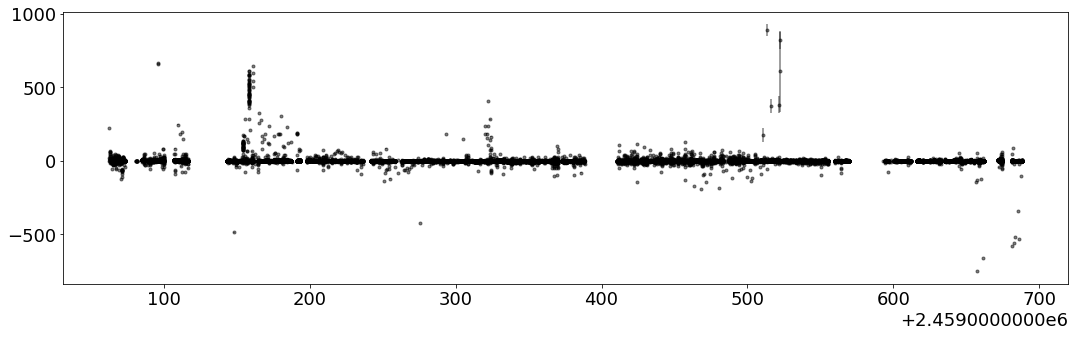

In [54]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(18, 5))
plt.errorbar(bjd, rv, yerr=σrv, fmt=".k", capsize=0, alpha=0.5)
plt.show()

### Quality RVs

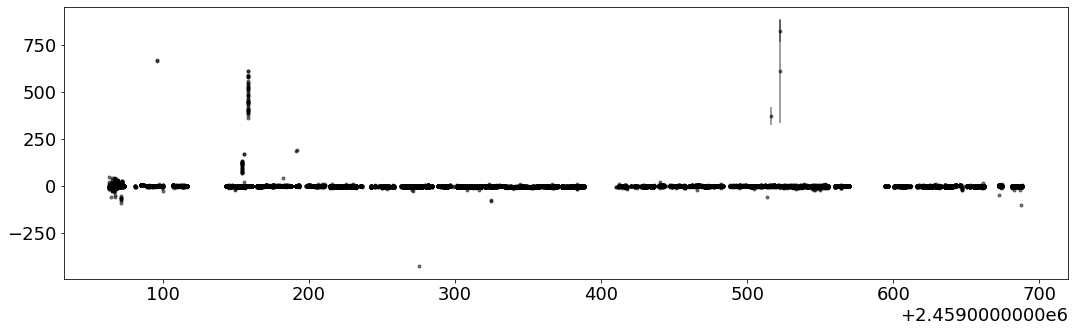

In [56]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(18, 5))
idx_quality = EXPRES_df['quality']>0.9
plt.errorbar(bjd[idx_quality], rv[idx_quality], yerr=σrv[idx_quality], fmt=".k", capsize=0, alpha=0.5)
plt.show()

In [57]:
len(bjd)

34451

### Exposure time

Text(-7.059999999999995, 0.5, 'Density')

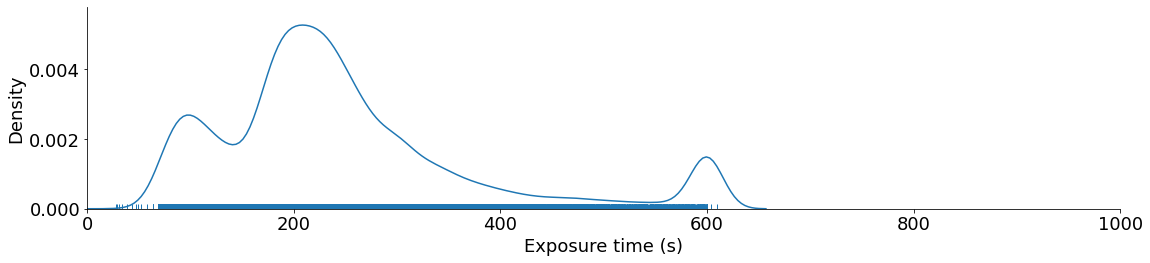

In [58]:
import seaborn as sns
idx_expt = EXPRES_df['expt']<800
sns.displot(data=EXPRES_df['expt'][idx_expt],  kind="kde", rug=True, height=4, aspect=4)
plt.xlim([0,1000])
plt.xlabel('Exposure time (s)')
plt.ylabel('Density')

<AxesSubplot:xlabel='expt', ylabel='Density'>

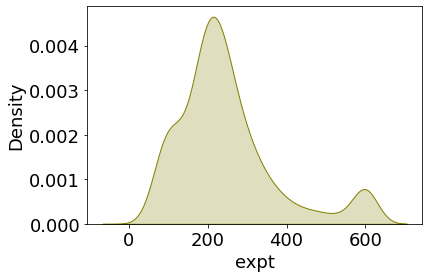

In [59]:
sns.kdeplot(EXPRES_df['expt'][idx_expt], shade=True, bw_method=0.5, bw_adjust=.5, color="olive")

Text(191.67100000000573, 1000, 'median = 190.7')

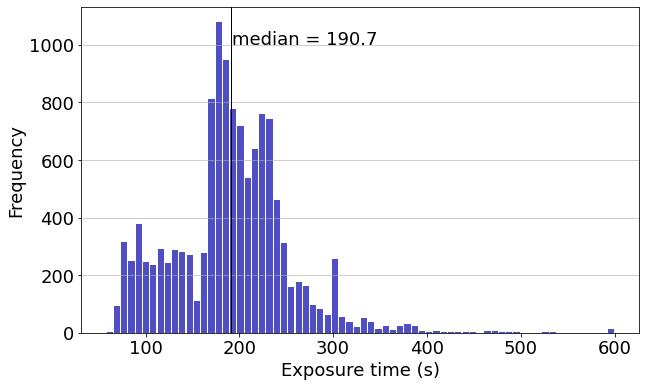

In [60]:
fig = plt.figure(figsize=(10, 6))
expt = EXPRES_df['expt'][idx_quality&idx_expt&idx_airmass&idx_std]
n, bins, patches = plt.hist(x=expt, bins=70, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Exposure time (s)')
plt.ylabel('Frequency')
plt.axvline(x=np.median(expt), c='k', lw=1)
plt.text(np.median(expt)+1, 1000, 'median = {:.1f}'.format(np.median(expt)))
# plt.title('My Very Own Histogram')
# plt.text(23, 45, r'$\mu=15, b=3$')
# maxfreq = n.max()
# Set a clean upper y-axis limit.
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [101]:
EXPRES_df['expt']

0        300.003999
1        300.004001
2        300.003000
3        300.003000
4        300.003000
            ...    
34446    137.442001
34447    134.546000
34448    151.542999
34449    151.240999
34450    253.239000
Name: expt, Length: 34451, dtype: float64

Text(223.74799999999644, 1000, 'median = 222.7')

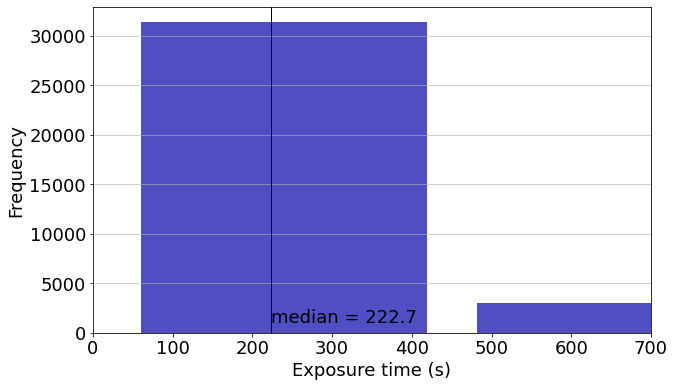

In [99]:
fig = plt.figure(figsize=(10, 6))
expt = EXPRES_df['expt']
n, bins, patches = plt.hist(x=expt, bins=50, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Exposure time (s)')
plt.ylabel('Frequency')
plt.xlim([0,700])
plt.axvline(x=np.median(expt), c='k', lw=1)
plt.text(np.median(expt)+1, 1000, 'median = {:.1f}'.format(np.median(expt)))

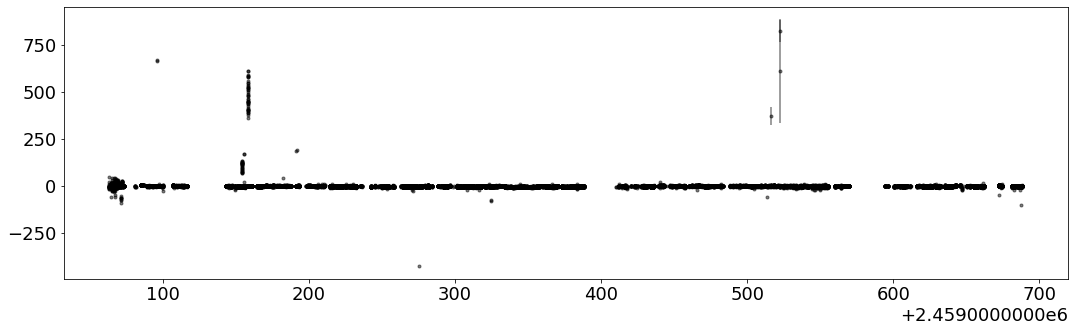

In [62]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(18, 5))
idx_quality = EXPRES_df['quality']>0.9
plt.errorbar(bjd[idx_quality&idx_expt], rv[idx_quality&idx_expt], yerr=σrv[idx_quality&idx_expt], fmt=".k", capsize=0, alpha=0.5)
plt.show()

### Airmass

<AxesSubplot:xlabel='secz', ylabel='Density'>

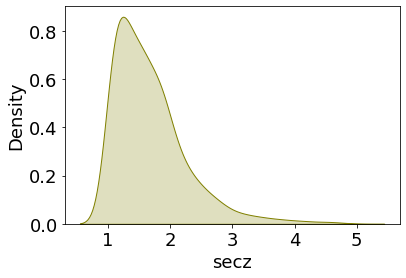

In [63]:
idx_airmass = (EXPRES_df['secz']>-10) & (EXPRES_df['secz']<5)
sns.kdeplot(EXPRES_df['secz'][idx_airmass], shade=True, bw_method=0.5, bw_adjust=.5, color="olive")

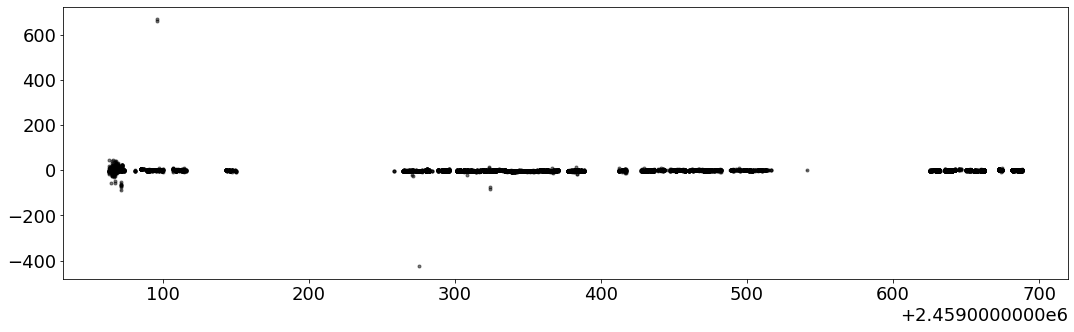

In [64]:
fig = plt.figure(figsize=(18, 5))
idx_airmass = (EXPRES_df['secz']>-10) & (EXPRES_df['secz']<1.5)
plt.errorbar(bjd[idx_quality&idx_expt&idx_airmass], 
             rv[idx_quality&idx_expt&idx_airmass], 
             yerr=σrv[idx_quality&idx_expt&idx_airmass],
             fmt=".k", capsize=0, alpha=0.5)
plt.show()

In [13]:
# fig = plt.figure(figsize=(18, 5))
# idx_airmass = (EXPRES_df['secz']>-10) & (EXPRES_df['secz']<1.5)
# plt.errorbar(bjd[idx_quality&idx_expt&idx_airmass], 
#              rv[idx_quality&idx_expt&idx_airmass], 
#              yerr=σrv[idx_quality&idx_expt&idx_airmass],
#              fmt=".k", capsize=0, alpha=0.5)
# plt.xlim([min(bjd)+(max(bjd)-min(bjd))*0.6, min(bjd)+(max(bjd)-min(bjd))*0.65])
# plt.show()

### 3-sigma crop

In [65]:
# remove 3-singma outliers 

y1 = rv[idx_quality&idx_expt&idx_airmass]
y_median1 = np.median(y1)
y_std1 = np.std(y1)
idx_3σ_1 = (y1<(y_median1+3*y_std1)) & (y1>(y_median1-3*y_std1))

y2 = y1[idx_3σ_1]
y_median2 = np.median(y2)
y_std2 = np.std(y2)
idx_3σ_2 = (y2<(y_median2+3*y_std2)) & (y2>(y_median2-3*y_std2))


In [66]:
y_median1, y_std1, y_median2, y_std2

(-1.4775767592344664,
 9.845137622966728,
 -1.4773458038816898,
 2.625615150633226)

In [67]:
idx_std = (rv<(y_median2+3*y_std2)) & (rv>(y_median2-3*y_std2))

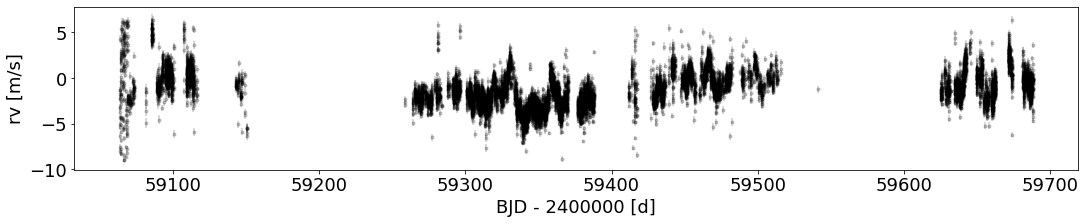

In [76]:
fig, axes = plt.subplots(figsize=(18, 3))
idx_airmass = (EXPRES_df['secz']>-10) & (EXPRES_df['secz']<1.5)
plt.errorbar(bjd[idx_quality&idx_expt&idx_airmass&idx_std]-2400000, 
             rv[idx_quality&idx_expt&idx_airmass&idx_std], 
             yerr=σrv[idx_quality&idx_expt&idx_airmass&idx_std],
             fmt=".k", capsize=0, alpha=0.2)
plt.xlabel('BJD - 2400000 [d]')
plt.ylabel('rv [m/s]')
plt.show()

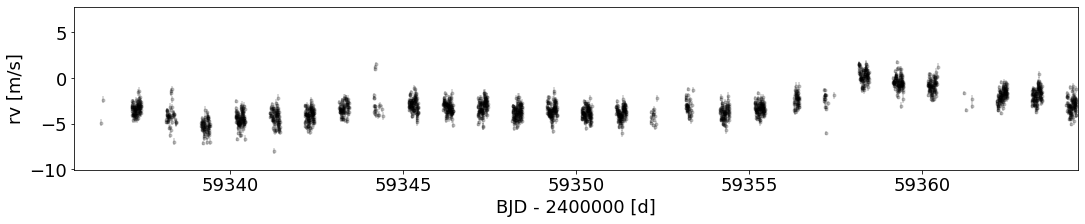

In [78]:
from datetime import datetime
from PyAstronomy import pyasl

start_date = datetime(2021, 5, 1)
end_date = datetime(2021, 5, 30)

fig, axes = plt.subplots(figsize=(18, 3))
idx_airmass = (EXPRES_df['secz']>-10) & (EXPRES_df['secz']<1.5)
plt.errorbar(bjd[idx_quality&idx_expt&idx_airmass&idx_std]-2400000, 
             rv[idx_quality&idx_expt&idx_airmass&idx_std], 
             yerr=σrv[idx_quality&idx_expt&idx_airmass&idx_std],
             fmt=".k", capsize=0, alpha=0.2)

plt.xlim([pyasl.jdcnv(start_date)-2400000, pyasl.jdcnv(end_date)-2400000])
plt.xlabel('BJD - 2400000 [d]')
plt.ylabel('rv [m/s]')
plt.show()

### Number of observations per day

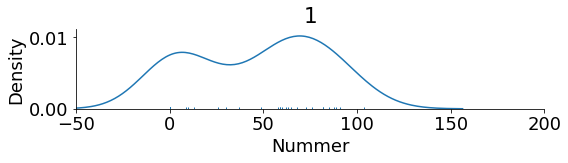

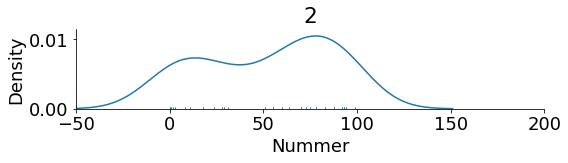

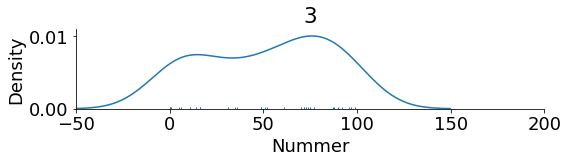

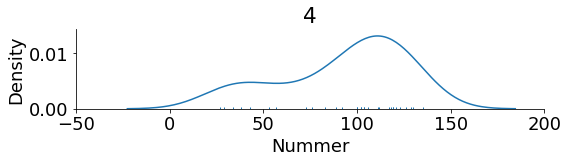

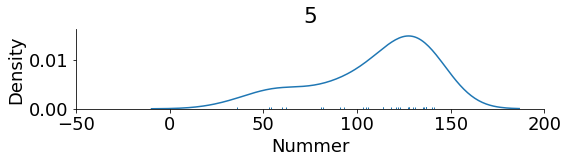

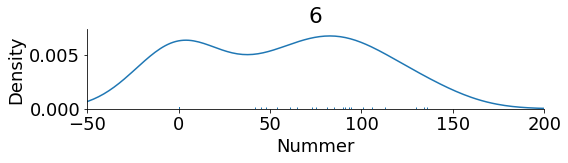

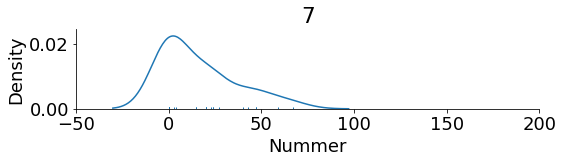

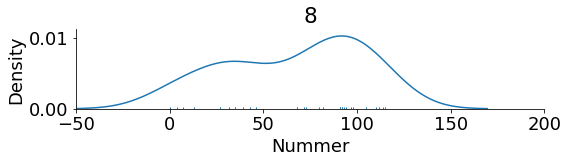

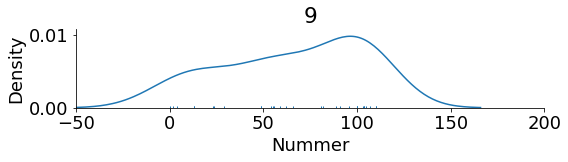

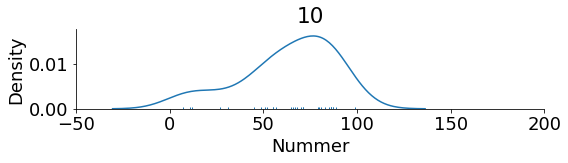

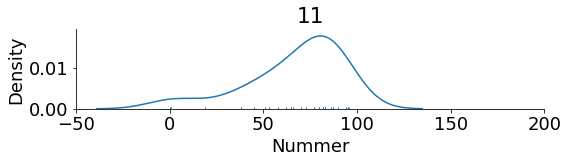

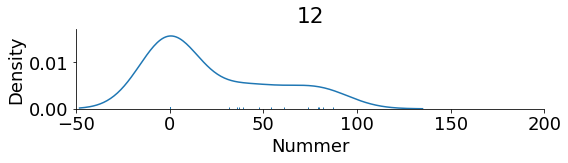

In [79]:
import seaborn as sns

for month in range(12):
    start_date = datetime(2021, month+1, 1)
    end_date = start_date+timedelta(30)
    # end_date = datetime(2021, 1, 31)

    Nummer = []
    for date in daterange(start_date, end_date):
        T1 = pyasl.jdcnv(date)
        idx_bjd = (bjd>T1) & (bjd<T1+1) #& (idx_quality&idx_expt&idx_airmass&idx_std)
        Nummer.append(len(bjd[idx_bjd]))

    # print(len(Nummer))
    sns.displot(data=Nummer,  kind="kde", rug=True, height=2, aspect=4)
    plt.title(str(month+1))
    plt.xlabel('Nummer')
    plt.ylabel('Density')
    plt.xlim([-50,200])

(-50.0, 200.0)

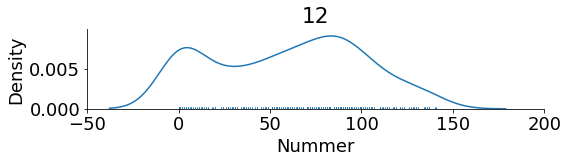

In [81]:
import seaborn as sns

# for month in range(12):
start_date = datetime(2021, 1, 1)
end_date = datetime(2021, 12, 31)
# end_date = datetime(2021, 1, 31)

Nummer = []
for date in daterange(start_date, end_date):
    T1 = pyasl.jdcnv(date)
    idx_bjd = (bjd>T1) & (bjd<T1+1) #& (idx_quality&idx_expt&idx_airmass&idx_std)
    Nummer.append(len(bjd[idx_bjd]))

# print(len(Nummer))
sns.displot(data=Nummer,  kind="kde", rug=True, height=2, aspect=4)
plt.title(str(month+1))
plt.xlabel('Nummer')
plt.ylabel('Density')
plt.xlim([-50,200])

In [89]:
Nummer = np.array(Nummer)
np.median(Nummer[Nummer>50])

86.0

In [ ]:
pyasl.jdcnv(start_date), pyasl.jdcnv(end_date)

In [90]:
# %matplotlib inline
from scipy.signal import hilbert, chirp
import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from datetime import datetime
import celerite
from celerite import terms
from scipy.optimize import minimize
from scipy.signal import find_peaks
from astropy.timeseries import LombScargle
from datetime import timedelta, date
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


from NEID_solar_functions import *
from GP_kernels import *

def moving_ave(t, y, width=2):
    w_aves = []
    for t_i in t:
        weights = stats.norm.pdf(t, t_i, width)
        # weights = np.multiply(abs(array_x-t_i)<width, 1) 
        w_ave, _ = weighted_avg_and_std(y, weights)
        w_aves.append(w_ave)
        # w_stds.append(w_std)
    return np.array(w_aves)

/tmp/ipykernel_42970/2170353083.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15, 6))


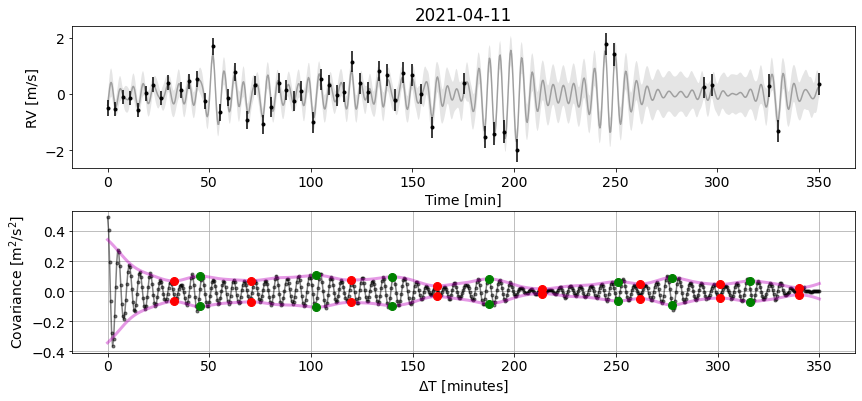

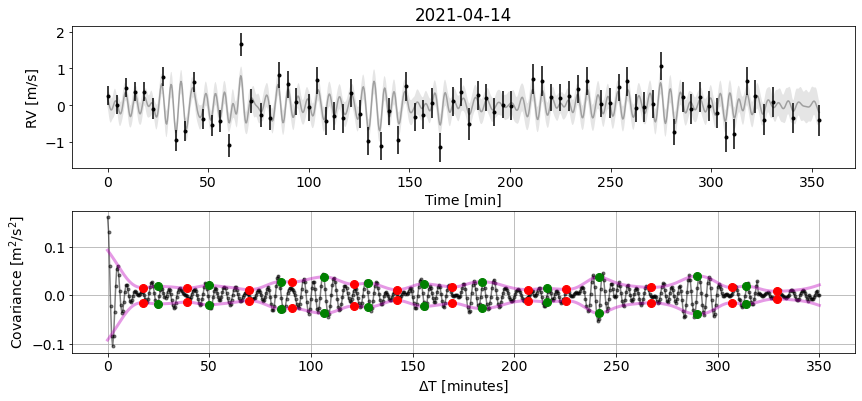

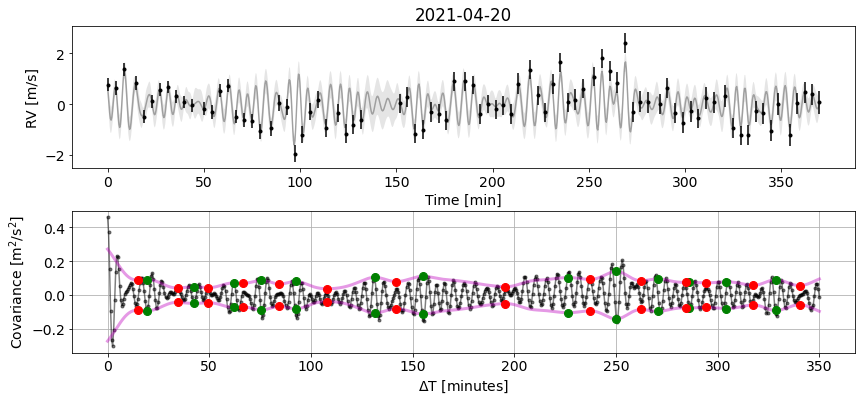

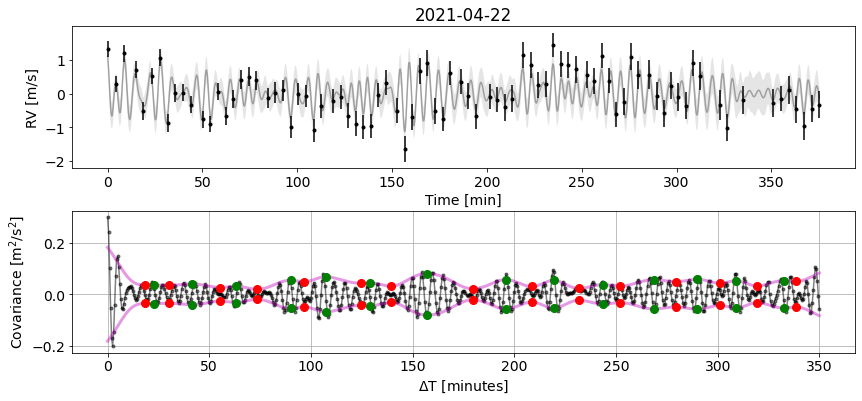

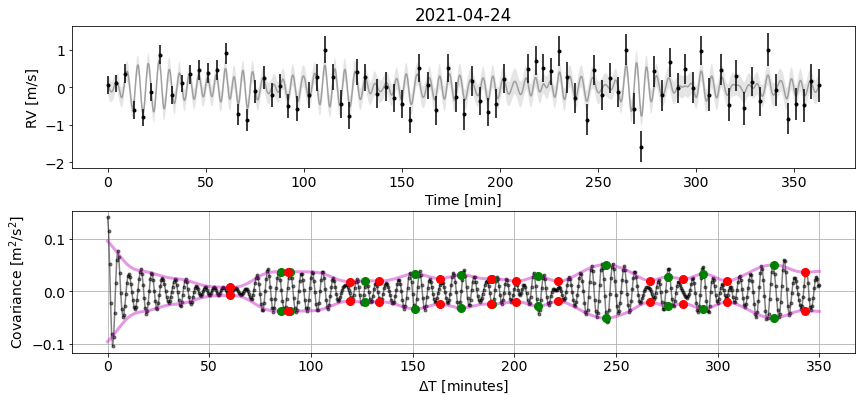

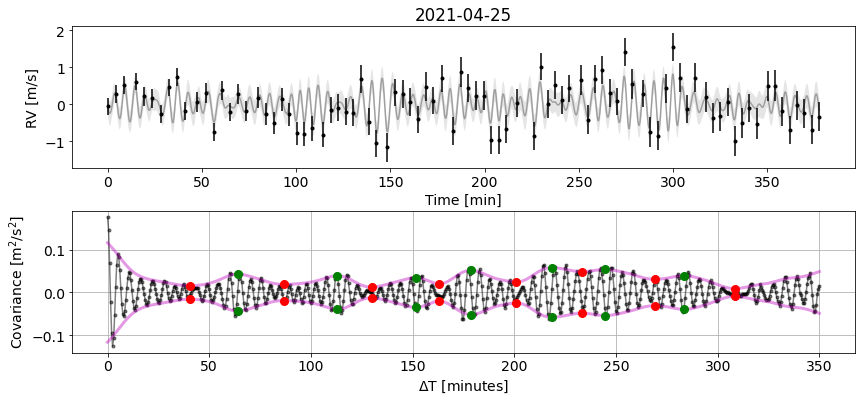

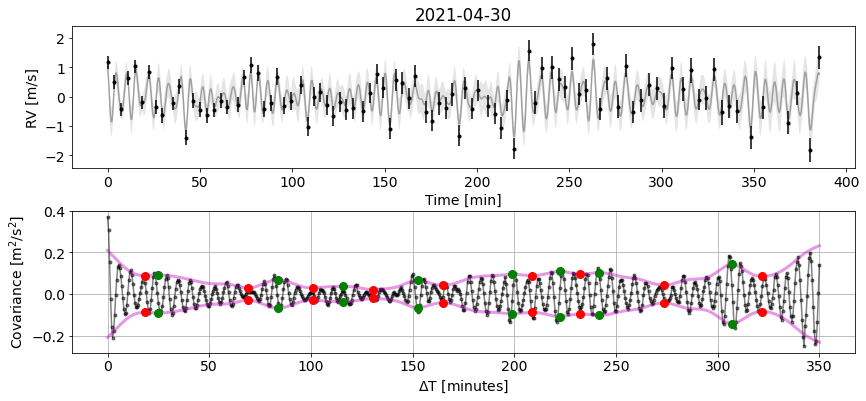

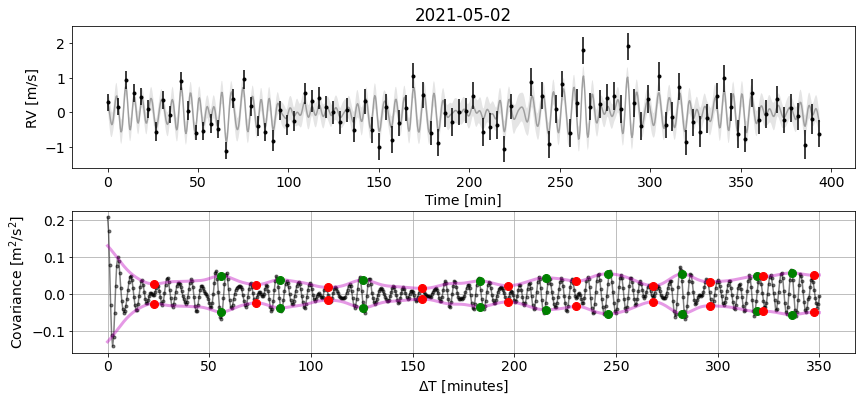

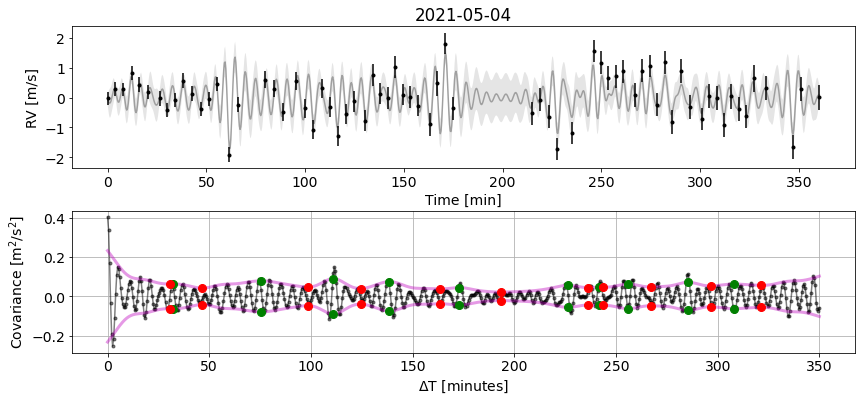

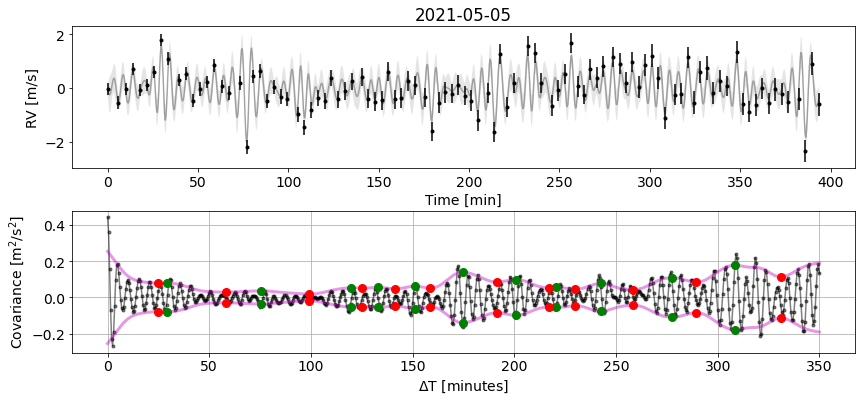

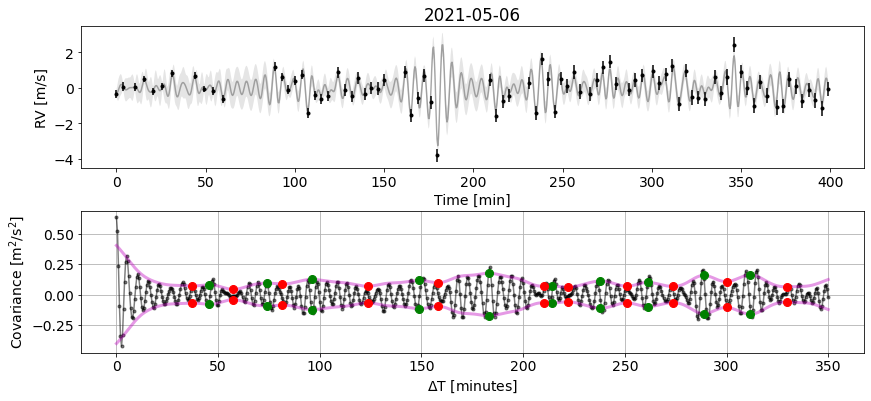

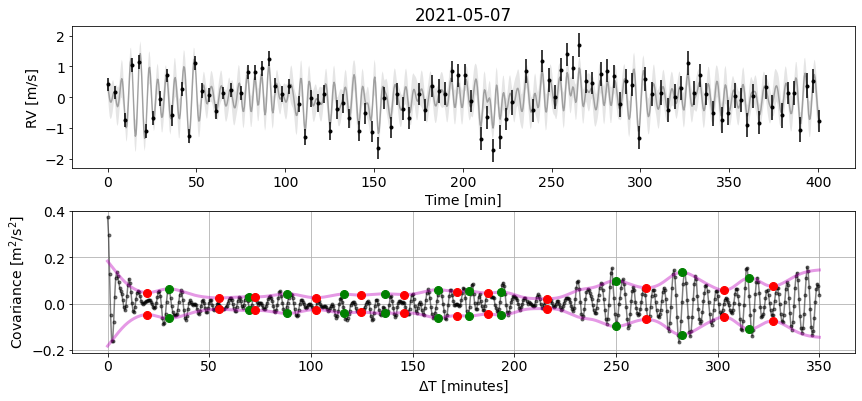

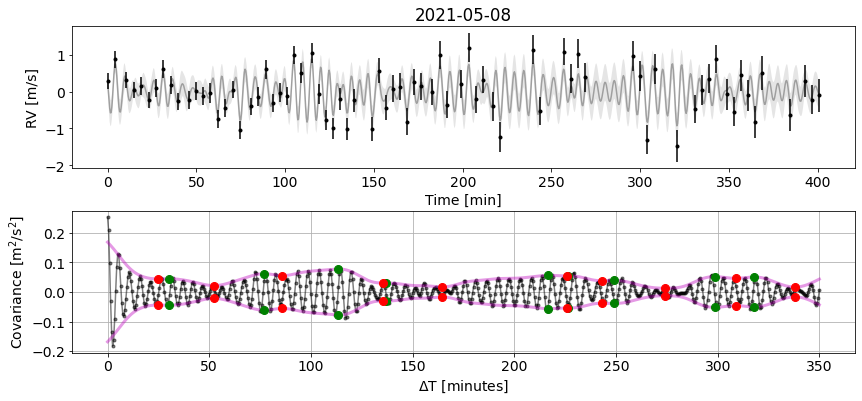

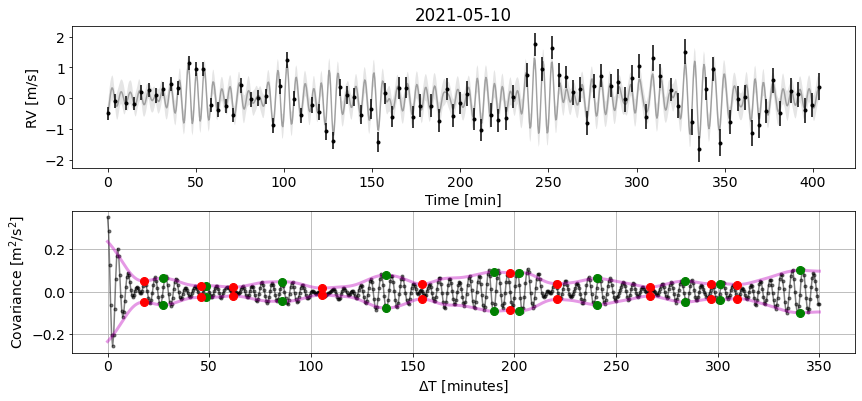

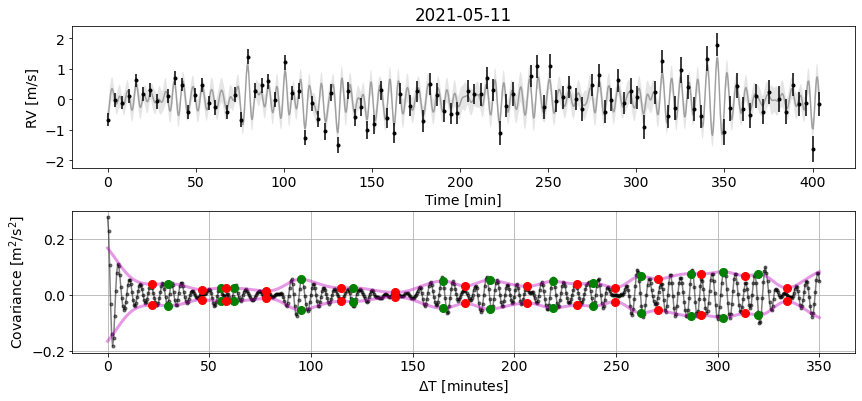

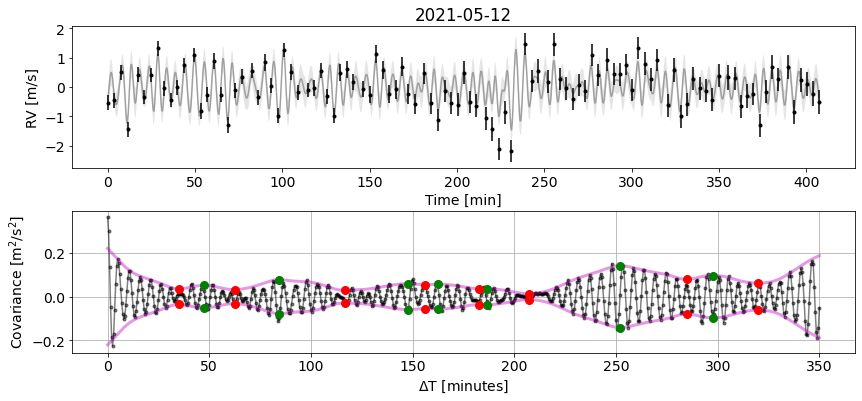

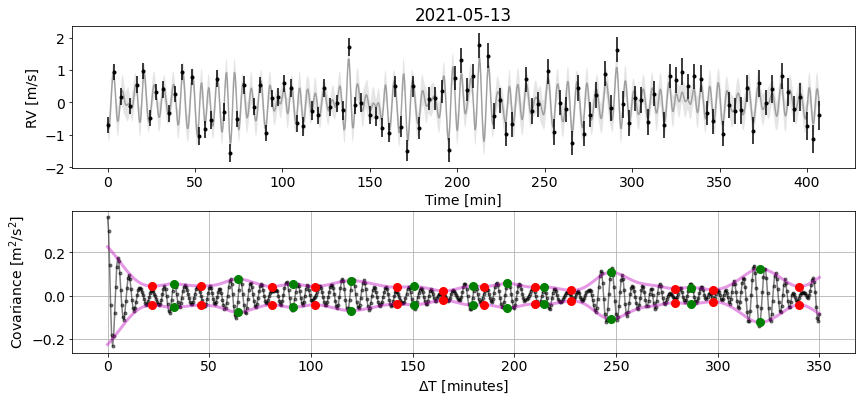

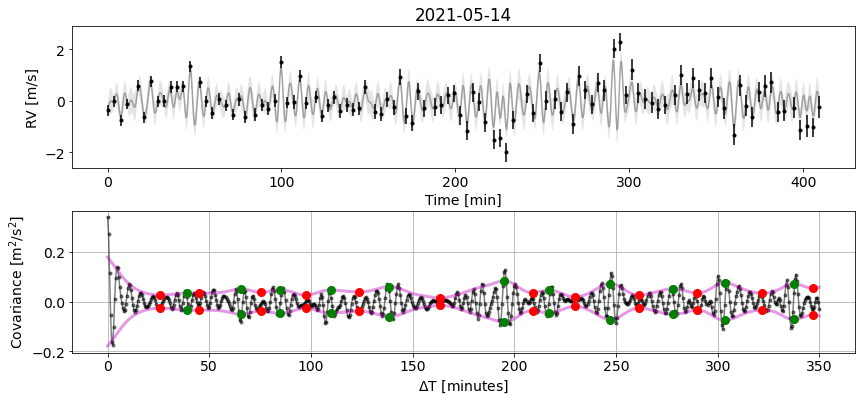

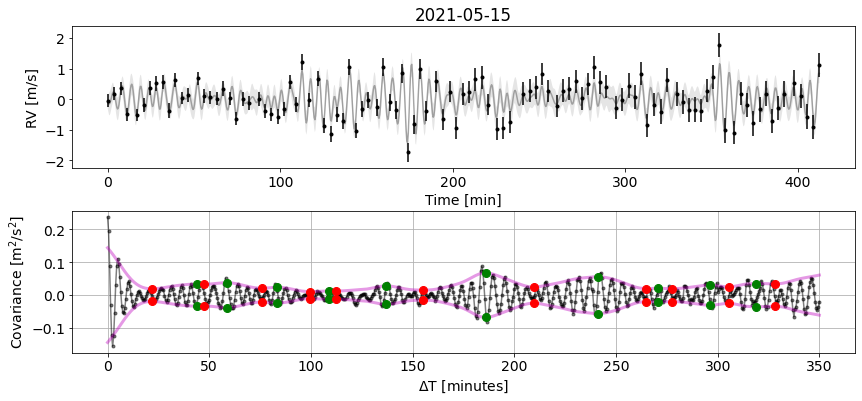

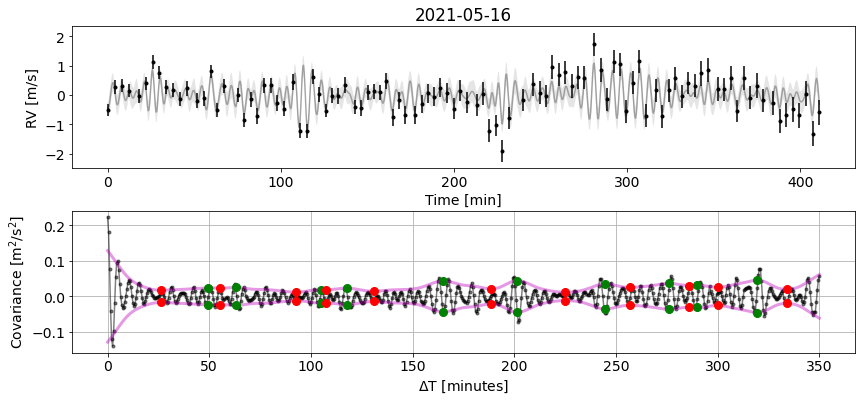

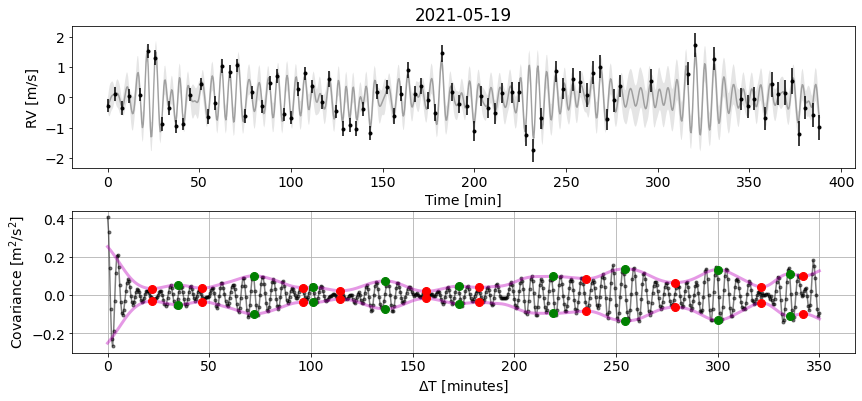

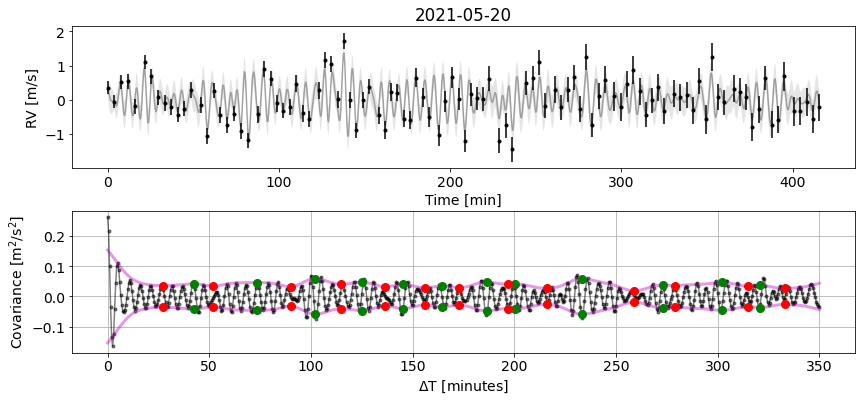

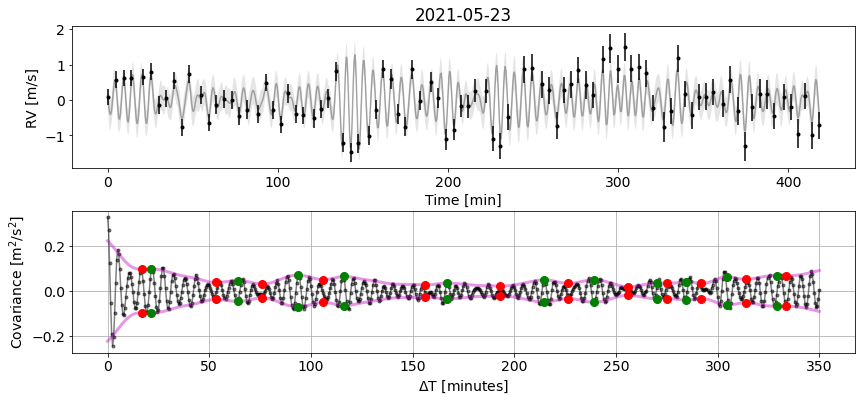

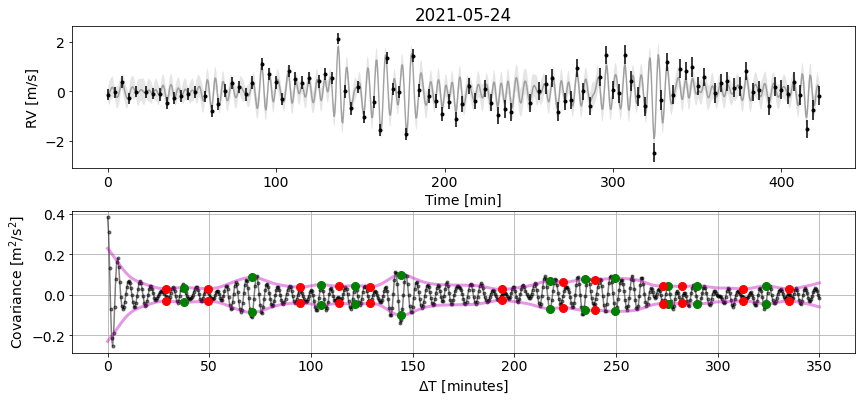

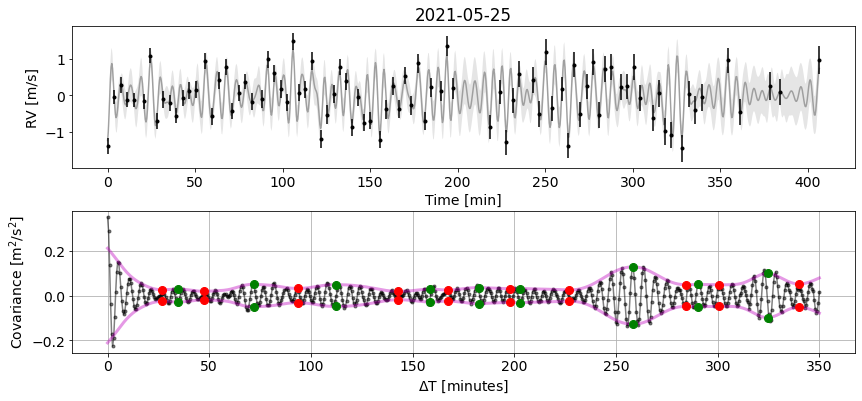

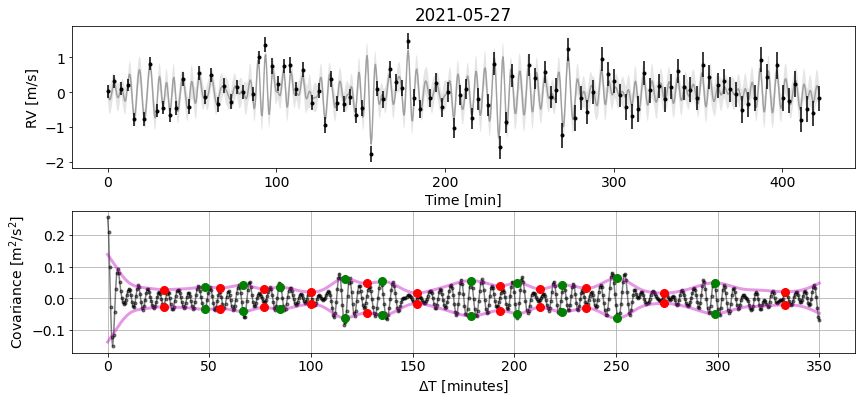

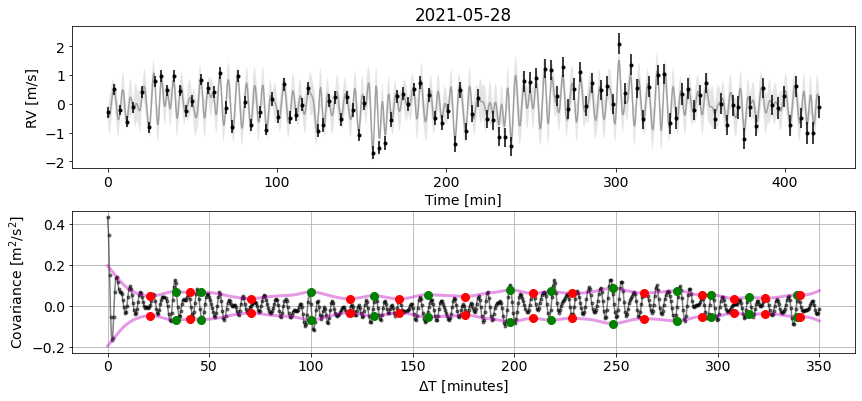

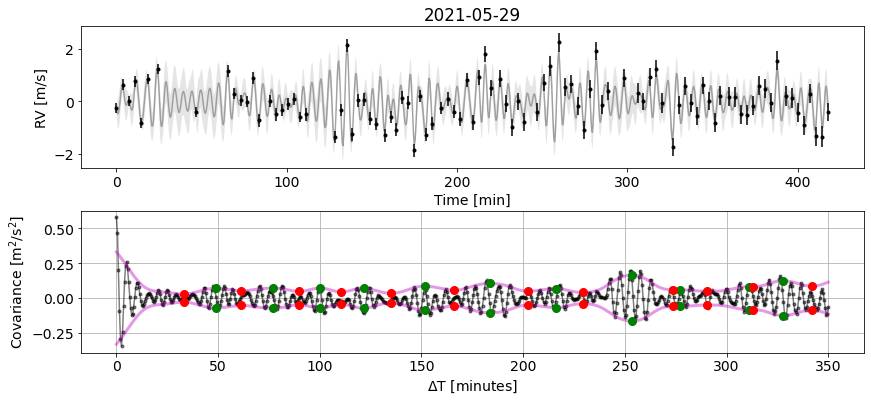

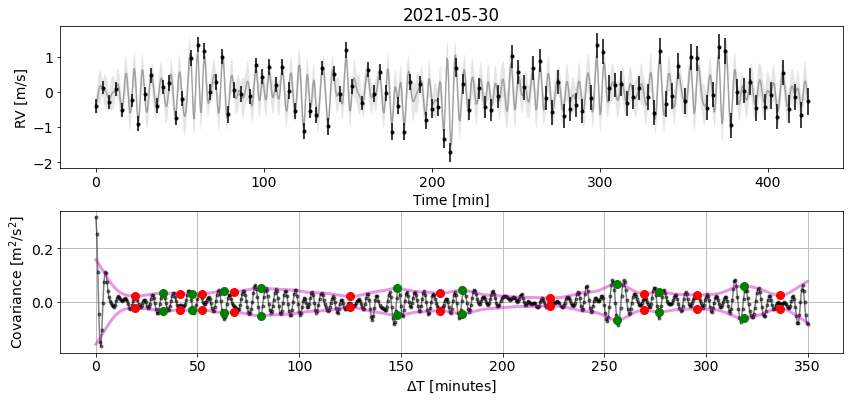

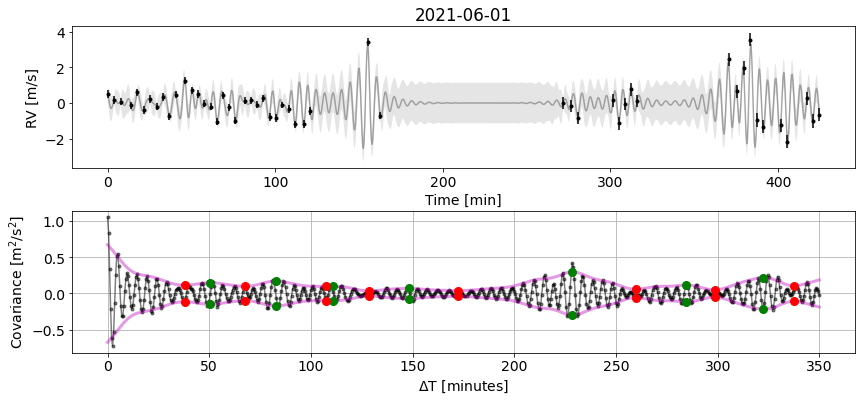

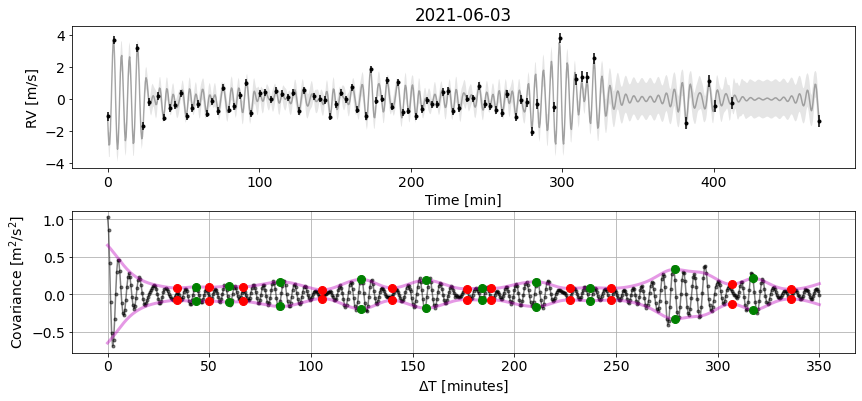

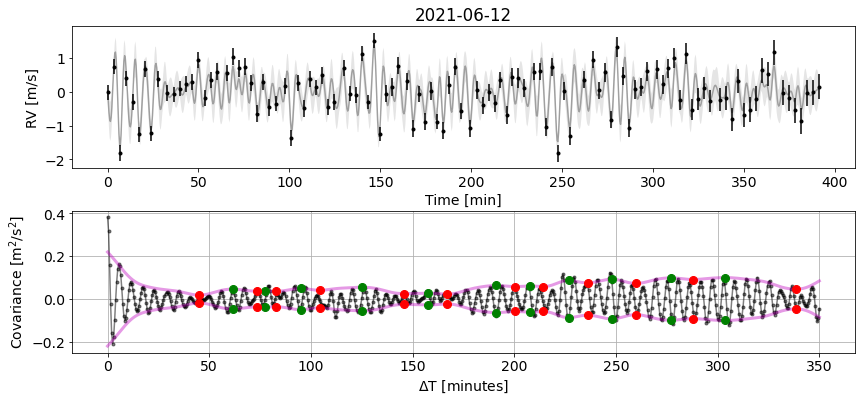

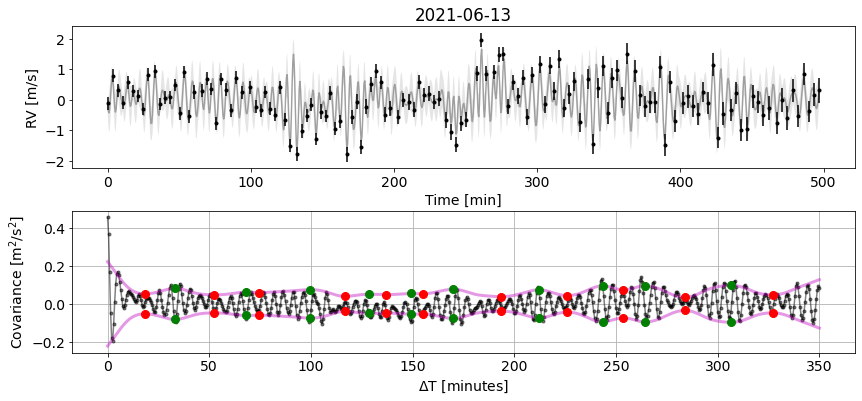

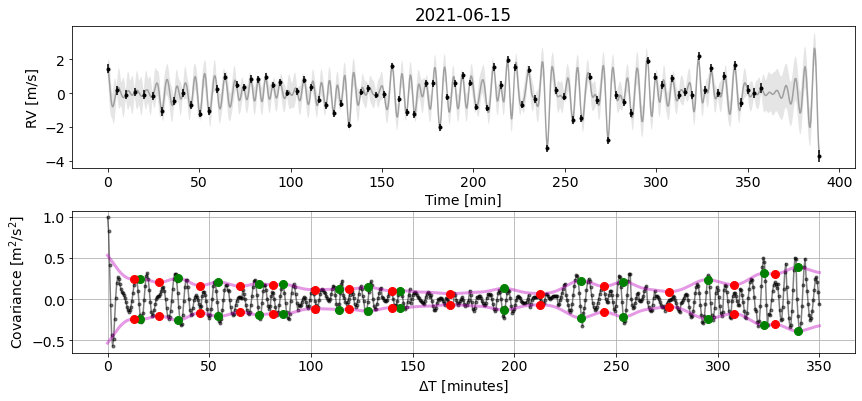

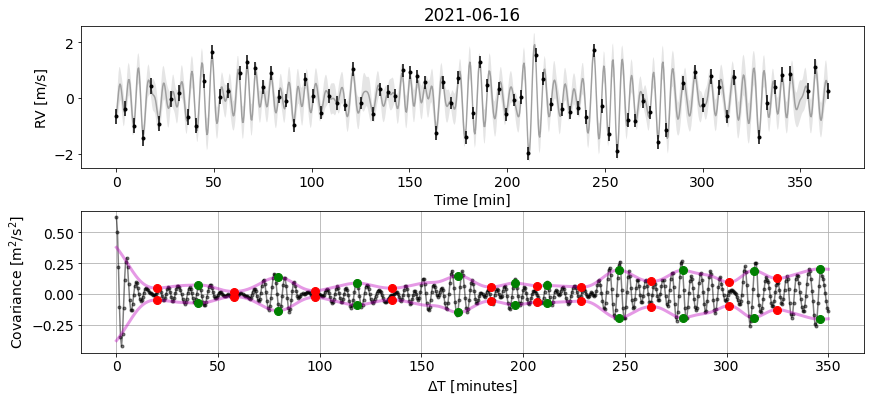

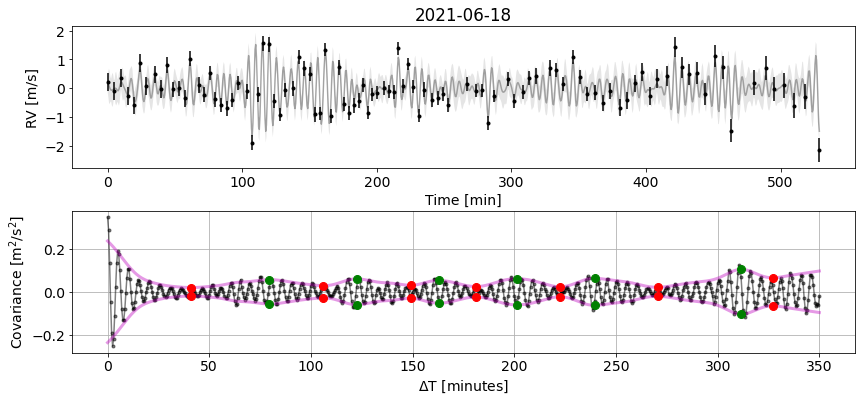

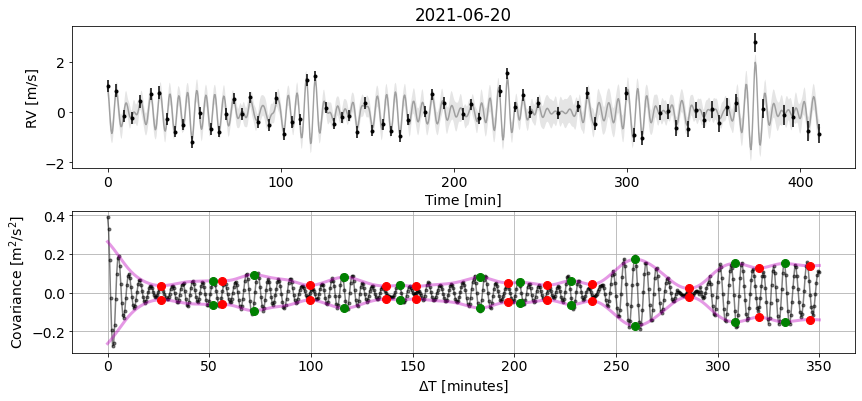

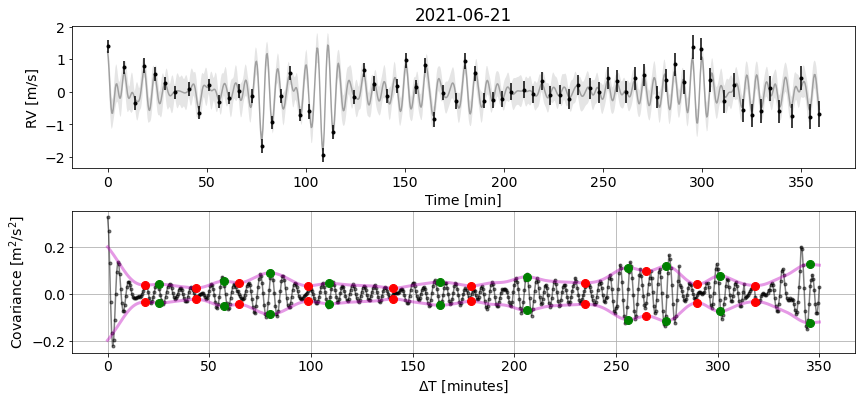

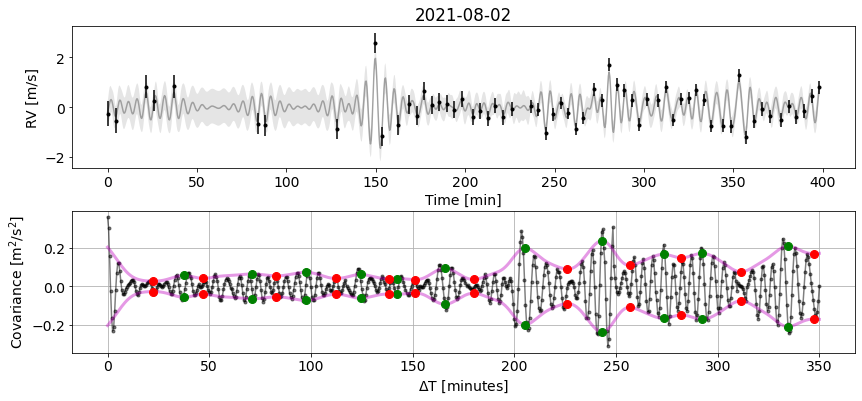

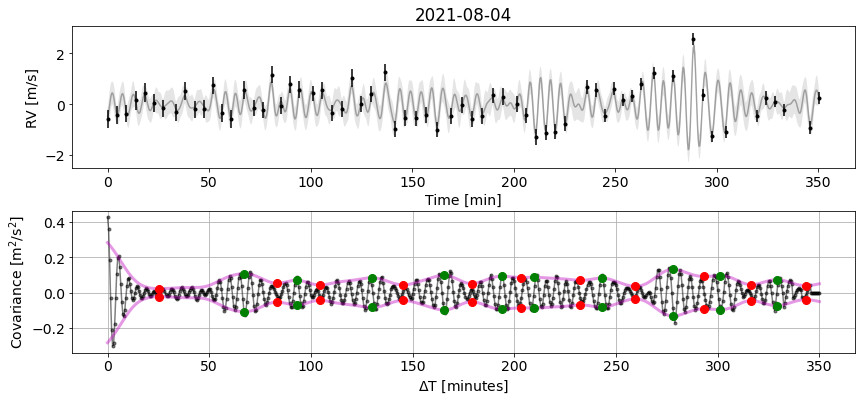

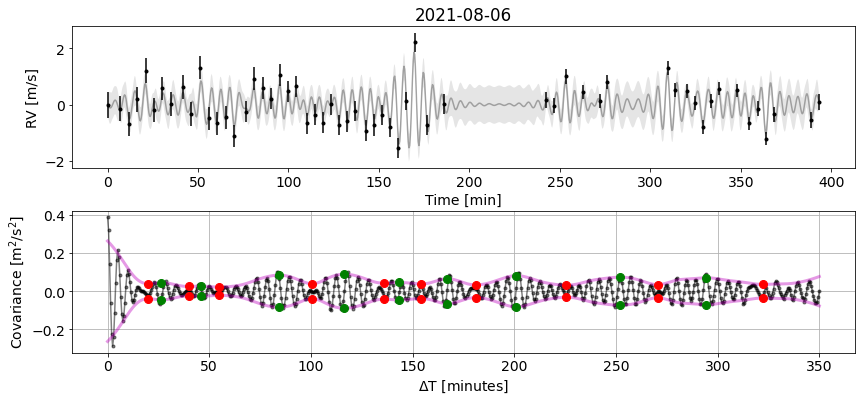

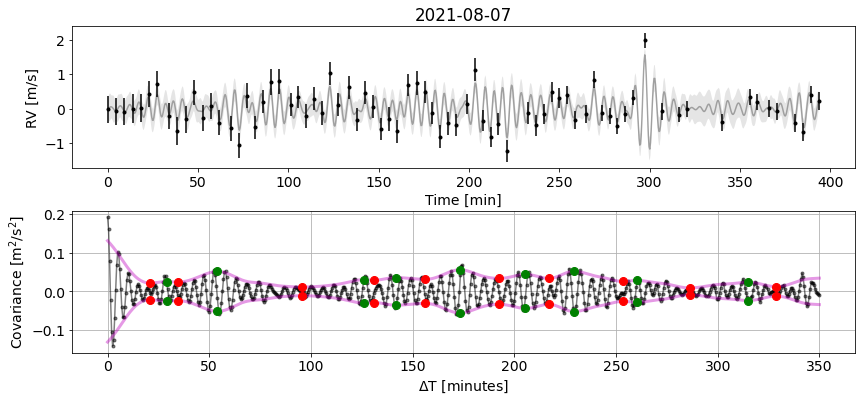

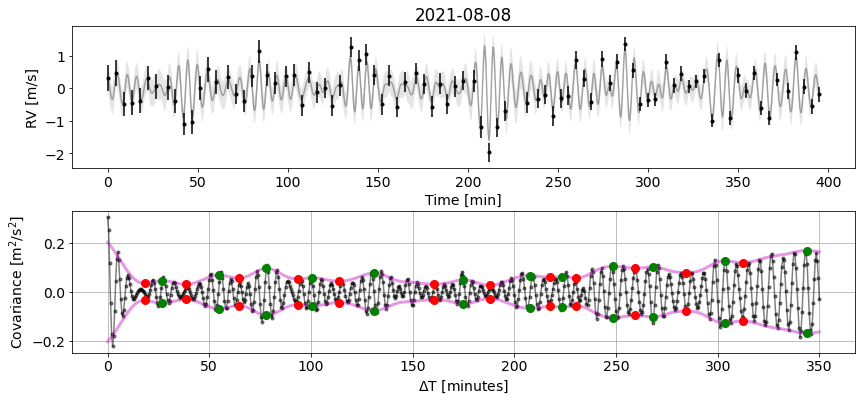

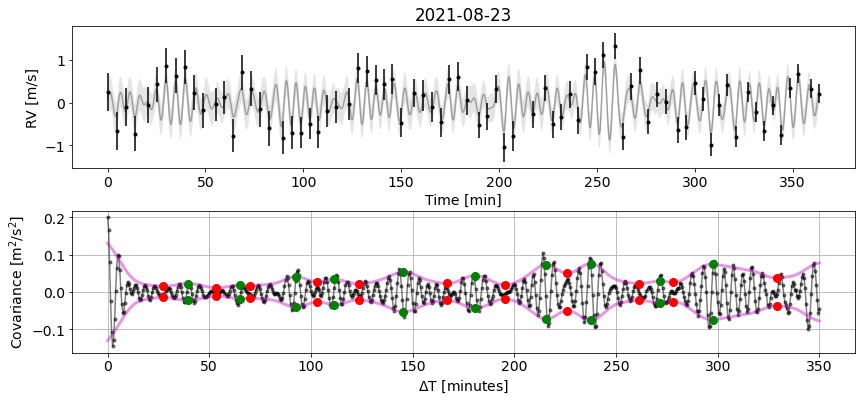

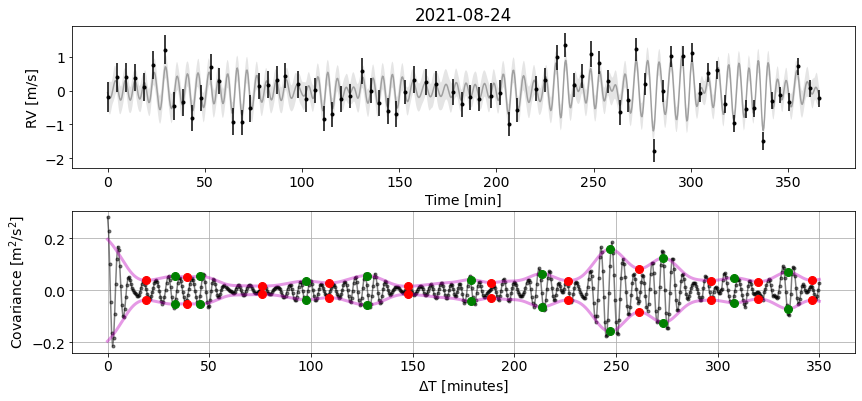

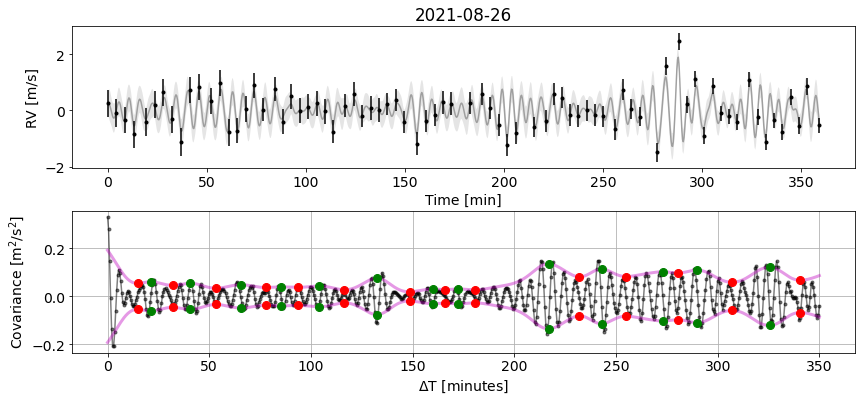

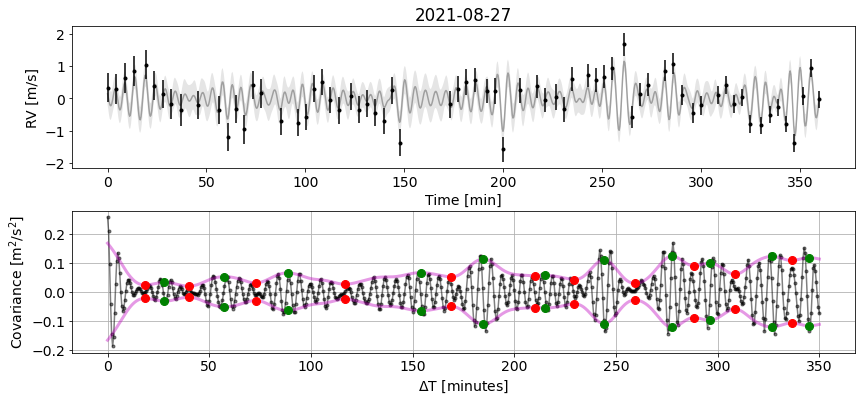

In [91]:
start_date = datetime(2021, 1, 1)
end_date = datetime(2021, 12, 31)
# start_date = datetime(2021, 1, 1)
# end_date = datetime(2021, 12, 31)

# beats_widths = np.array([])
beats_heights = np.array([])
beats_centres = np.array([])
days = np.array([])

beats_widths_by_day = []
beats_heights_by_day = []
beats_centres_by_day = []

Day = []
Amplitude_envelopes = np.array([])
Cov_XYs = np.array([])

for date in daterange(start_date, end_date):

    T1 = pyasl.jdcnv(date)
    idx_bjd = (bjd>T1) & (bjd<T1+1) & (idx_quality&idx_expt&idx_airmass&idx_std)
    
    if (len(bjd[idx_bjd])>50):

        t = (bjd[idx_bjd]-min(bjd[idx_bjd]))*24*60
        delta_t = max(t) - min(t)
        # print(delta_t)
        
        if delta_t>350:

            y = rv[idx_bjd] - np.mean(rv[idx_bjd])
        
            # new
            idx_h = (t<=max(t)-0) & (t>=0)
            t = t[idx_h]
            y = y[idx_h]
            yerr = σrv[idx_bjd][idx_h]
            # new

            if 0:
                reg = LinearRegression().fit(t.reshape((-1, 1)), y)
                y = y - reg.predict(t.reshape((-1, 1)))
                yerr = σrv[idx_bjd]
                # yerr = (yerr**2 + 0.25**2)**0.5 # new        
            if 1:
                poly_para = np.polyfit(t, y, 2)
                predict_func = np.poly1d(poly_para)
                y = y - predict_func(t)

            gp = GP_fit_p1(t, y, yerr, p=5.2)

            ############
            # plotting #
            ############
            fig = plt.figure(figsize=(15, 6))
            plt.subplots_adjust(right=0.85, hspace=0.3)
            plt.rcParams.update({'font.size': 14})

            ## Upper panel    
            fig.add_subplot(211)
            plt.title(str(date)[:10])
            plt.errorbar(t, y, yerr=yerr, fmt=".k", capsize=0)
            # plt.plot(t, predict_func(t), lw=3, alpha=0.3)
            x = np.linspace(min(t), max(t), 1000)
            pred_mean, pred_var = gp.predict(y, x, return_var=True)
            pred_std = np.sqrt(pred_var)        
            plt.plot(x, pred_mean, color='k', alpha=0.3)
            plt.fill_between(x, pred_mean+pred_std, pred_mean-pred_std, color='k', alpha=0.1,
                             edgecolor="none")
            plt.xlabel("Time [min]")
            plt.ylabel("RV [m/s]")

            ## Lower panel 
            Delta_t = np.linspace(0, 350, 701)
            cov_XY = []
            
#             # new
            
#             for delta_t in Delta_t:
#                 t_cov = np.linspace(0, max(t)-delta_t, 300)
#                 X, _ = gp.predict(y, t_cov, return_var=False)
#                 # X = y[t<(max(t)-delta_t)]
#                 Y, _ = gp.predict(y, t_cov+delta_t, return_var=False)
#                 cov_XY.append(cov(X, Y))
#             # new
            
            for delta_t in Delta_t:
                X = y[t<(max(t)-delta_t)]
                Y, _ = gp.predict(y, t[t<(max(t)-delta_t)]+delta_t, return_var=False)
                cov_XY.append(cov(X, Y))
            cov_XY = np.array(cov_XY)
            
            analytic_signal = hilbert(cov_XY)
            amplitude_envelope = np.abs(analytic_signal)
            amplitude_envelope = moving_ave(Delta_t, amplitude_envelope, width=5) 
            peaks1, prop1 = find_peaks(amplitude_envelope, height=0.01)  # local max 
            peaks2, prop2 = find_peaks(-amplitude_envelope, height=-10) # local min 
            if len(Amplitude_envelopes) == 0:
                Amplitude_envelopes = amplitude_envelope
                Cov_XYs = cov_XY
            else:
                Amplitude_envelopes = np.vstack((Amplitude_envelopes, amplitude_envelope))
                Cov_XYs = np.vstack((Cov_XYs, cov_XY))

            fig.add_subplot(212)
            plt.plot(Delta_t, cov_XY, 'k.-', alpha=0.5)
            plt.plot(Delta_t, amplitude_envelope, 'm', lw=3, alpha=0.4)
            plt.plot(Delta_t, -amplitude_envelope, 'm', lw=3, alpha=0.4)
            plt.plot(Delta_t[peaks1], prop1['peak_heights'], 'o', color='green', markersize=8)
            plt.plot(Delta_t[peaks1], -prop1['peak_heights'], 'o', color='green', markersize=8)
            plt.plot(Delta_t[peaks2], prop2['peak_heights'], 'o', color='red', markersize=8)
            plt.plot(Delta_t[peaks2], -prop2['peak_heights'], 'o', color='red', markersize=8)    
            plt.xlabel(r'$\Delta$T [minutes]')
            plt.ylabel(r'Covariance [m$^2$/s$^2$]')
            plt.grid()    

            # plt.savefig('./figure2/'+str(date)[:10]+'.png')
            # plt.show()



            if 0:
                if len(prop1['peak_heights']) == len(np.diff(Delta_t[peaks2])):
                    beats_heights = np.hstack((beats_heights, prop1['peak_heights']))
                    beats_widths = np.hstack((beats_widths, np.diff(Delta_t[peaks2])))
                    beats_centres = np.hstack((beats_centres, Delta_t[peaks1]))

                if len(prop1['peak_heights']) == (len(np.diff(Delta_t[peaks2]))+1):
                    beats_heights = np.hstack((beats_heights, prop1['peak_heights'][:-1]))
                    beats_widths = np.hstack((beats_widths, np.diff(Delta_t[peaks2])))    
                    beats_centres = np.hstack((beats_centres, Delta_t[peaks1][:-1]))    

            if 1: # just getting the envelope peak centre position 
                beats_centres = np.hstack((beats_centres, Delta_t[peaks1]))
                beats_heights = np.hstack((beats_heights, prop1['peak_heights']))
                days = np.hstack((  days, T1*np.ones( len(Delta_t[peaks1]) )   ))
                beats_centres_by_day.append(Delta_t[peaks1])
                beats_heights_by_day.append(prop1['peak_heights'])
                Day.append(T1)


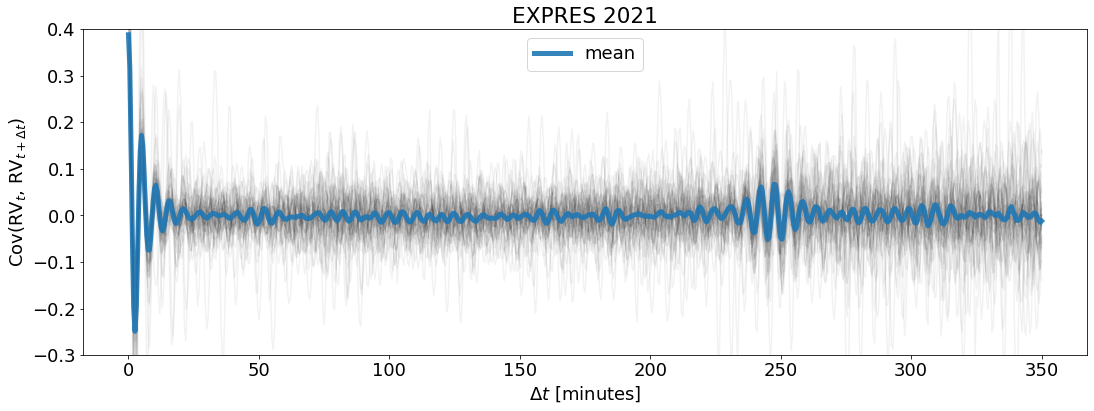

In [95]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(18, 6))
# fig.add_subplot(211)
plt.plot(Delta_t, Cov_XYs.T, 'k', alpha=0.05)

plt.plot(Delta_t, np.mean(Cov_XYs, axis=0), lw=5, alpha=0.9, label='mean')

# plt.axvline(x=1/(68e-6)/60, c='r', ls='--', lw=3, alpha=0.5)
plt.title('EXPRES 2021')
plt.ylim([-0.3,0.4])
plt.ylabel(r'Covariance [m$^2$/s$^2$]')
# plt.text(1/(68e-6)/60, 0.1, r'$\Delta \nu /2$', c='r', size=18)
plt.xlabel(r'$\Delta t$ [minutes]')
plt.ylabel(r'Cov(RV$_t$, RV$_{t+\Delta t}$)')
plt.legend()
plt.savefig('./0902/EXPRES_2021_cov_env_0.png', dpi=300)

# fig.add_subplot(212)
# plt.plot(Delta_t, Amplitude_envelopes.T, 'k', alpha=0.05)
# plt.plot(Delta_t, np.mean(Amplitude_envelopes, axis=0), lw=5, alpha=0.9, label='mean')
# plt.plot(Delta_t, np.median(Amplitude_envelopes, axis=0), lw=5, alpha=0.9, label='median')
# plt.xlabel(r'$\Delta$T [minutes]')
# plt.ylabel(r'Envelope [m$^2$/s$^2$]')
# plt.legend()
# plt.savefig('./0902/cov_env_0.png')
plt.show()